In [18]:
import utils as u
import numpy as np
import pickle
import matplotlib.pyplot as plt
with open('modal_plexi.pkl', 'rb') as f:
    modal_analysis_plexi = pickle.load(f)

with open('modal_m2.pkl', 'rb') as f:
    modal_analysis_m2 = pickle.load(f)

with open('modal_m1.pkl', 'rb') as f:
    modal_analysis_m1 = pickle.load(f)

with open('modal_metal.pkl', 'rb') as f:
    modal_analysis_metal = pickle.load(f)

In [12]:
Lx = 0.40
Ly = 0.26


h_metal = 6.01e-3
E_nu_metal = 7291666666
masse_metal = 1588e-3
rho_metal = masse_metal / (Lx * Ly * h_metal)

h_m2 = 6.04e-3 
E_nu_m2 = 7291666666
masse_m2 = 507e-3
rho_m2 =masse_m2 / (Lx * Ly * h_m2)

h_m1 = 2.95e-3 
E_nu_m1 = 7291666666
masse_m1 = 236e-3
rho_m1 = masse_m1 / (Lx * Ly * h_m1)

h_plexi = 4.51e-3
E_nu_plexi = 7291666666 
masse_plexi = 382e-3
rho_plexi = masse_plexi / (Lx * Ly * h_plexi)

In [19]:
def omega_pq (p,q,h,E_nu,rho,Lx,Ly) :    #Calcul analytique des pulsations propres d'une plaque en appuis simple
    return np.sqrt(E_nu*h**2/(12*rho)) * ((p*np.pi/Lx)**2+(q*np.pi/Ly)**2)

def phi_pq (p,q,x,y, Lx, Ly) :  #Calcul analytique des déformées des modes d'une plaque en appuis simple
    """
    ## Inputs
    - p : numéro du mode selon x
    - q : numéro du mode selon y
    - x : arrayLike, vecteur des abscisses
    - y : arrayLike, vecteur des ordonnées

    ## Outputs
    - phi_pq : arrayLike, size (Nx,Ny), déformée du mode (p,q) en tous les points (x,y) du maillage
    """
    return np.sin(p*np.pi*x[:,np.newaxis]/Lx)*np.sin(q*np.pi*y[np.newaxis,:]/Ly)

def mode_plaque(Lx,Ly,h,E_nu,rhoT):
    NB, MB = 3, 3 #Nombre de modes selon x, y
    NmB = NB * MB   #Nombre de modes total considéré dans le modèle de plaque

    dx, dy = 10e-3, 10e-3
    x, y = np.arange(0,Lx,dx), np.arange(0,Ly,dy)
    Nx, Ny = len(x), len(y)
    X_plate, Y_plate = np.meshgrid(x, y)
    X_ravel, Y_ravel = np.ravel(X_plate), np.ravel(Y_plate)

    ## Calcul des modes

    wnB = np.zeros(NmB)
    NmB_idx = np.zeros((2,NmB))   #Cette liste permet de remonter du mode contracté "i" au mode réel (n_i,m_i) en appelant NmB_idx[:,i]
    j = 0
    for n in range(1,NB+1) :
        for m in range(1,MB+1) :
            wnB[j] = omega_pq(n,m, h, E_nu,rhoT,Lx,Ly)
            NmB_idx[0,j] = n
            NmB_idx[1,j] = m
            j += 1

    ### Tri par ordre de fréquences croissantes
    tri_idx = np.argsort(wnB)

    wnB = wnB[tri_idx]    #On range les pulsations par ordre croissant 
    NmB_idx = NmB_idx[:,tri_idx]      #On ordonne les modes par ordre croissant

    ### Déformées

    phiB_NxNy_NmB = np.zeros((Nx*Ny,NmB)) #Matrice des déformées avec les 2 dimensions spatiales applaties en 1 dimension
    for mode in range (NmB) :
        n, m = NmB_idx[0,mode], NmB_idx[1,mode]
        phiB_NxNy_NmB[:,mode] = phi_pq(n, m , x, y, Lx, Ly).ravel()

    return(wnB/2/np.pi,phiB_NxNy_NmB,Nx,Ny)

##phiB_NxNy_NmB[:,j],(Nx,Ny)

In [27]:
f,phiB_NxNy_NmB,Nx,Ny = mode_plaque(Lx,Ly,h_m1,E_nu_m1,rho_m1)

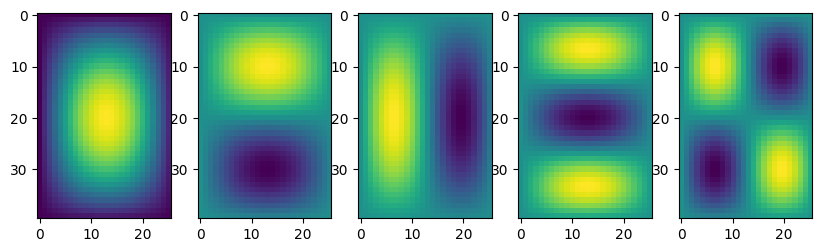

In [28]:
fig, ax = plt.subplots(1,5,figsize = (10,5))
for i in range(5):
    ax[i].imshow(np.reshape(phiB_NxNy_NmB[:,i],(Nx,Ny)))
plt.show()

(array([ 86.66463829, 163.88602952, 269.43716191, 292.58834824,
        346.65855314, 475.36087186, 574.05803462, 651.27942585,
        779.98174457]),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.02782198, -0.05547243, -0.052028  , ...,  0.06947208,
         -0.13851584,  0.2067056 ],
        [ 0.01877649, -0.03743722, -0.03646176, ...,  0.052028  ,
         -0.10373524,  0.15480291],
        [ 0.0094572 , -0.01885609, -0.01877649, ...,  0.02782198,
         -0.05547243,  0.08278087]]))

In [16]:
modal_analysis_m1

{'table': 'Medium_1',
 'freq': array([ 75, 149, 160, 184, 268, 286, 319, 345, 427, 460, 515, 602, 654]),
 'xi': array([-0.00026   , -0.00017893, -0.000337  , -0.000808  , -0.000549  ,
        -0.000603  , -0.000752  , -0.000908  , -0.000219  , -0.000758  ,
        -0.001235  , -0.001077  , -0.000958  ]),
 'ratios': array([1.        , 1.98666667, 2.13333333, 2.45333333, 3.57333333,
        3.81333333, 4.25333333, 4.6       , 5.69333333, 6.13333333,
        6.86666667, 8.02666667, 8.72      ]),
 'xi_mod': array([-0.08874667, -0.03074233, -0.05392   , -0.11241739, -0.05244179,
        -0.05397483, -0.06034859, -0.06737623, -0.01312974, -0.04218435,
        -0.06139029, -0.04579934, -0.03749969])}